## **Customer Segmentation Using Unsupervised Learning (Mall Dataset)**
**Group customers based on their spending behavior to help businesses design targeted marketing strategies.**

##**Import necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##**Load dataset**

In [3]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
#Basic statistical summary
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [8]:
df.shape

(200, 5)

## **Gender distribution**

Text(0.5, 1.0, 'Genre Distribution')

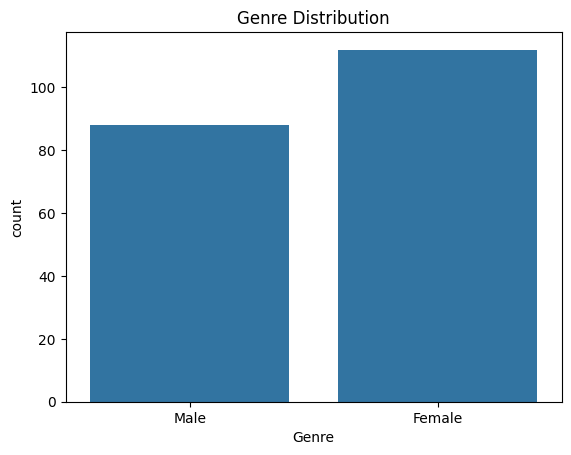

In [9]:
sns.countplot( data=df,x='Genre')
plt.title('Genre Distribution')

 ## **Age distribution**

Text(0.5, 1.0, 'Age Distribution')

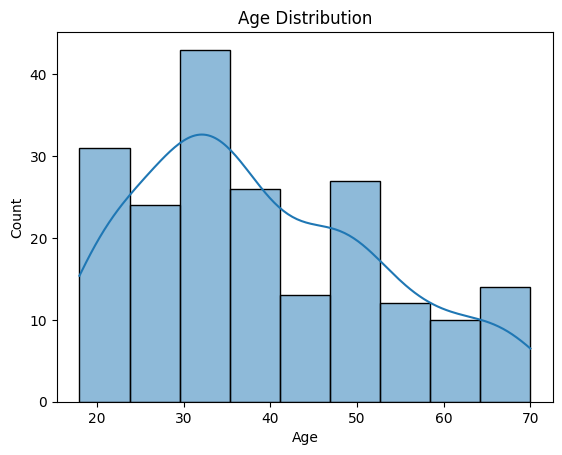

In [10]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')


## **Annual Income vs Spending Score**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

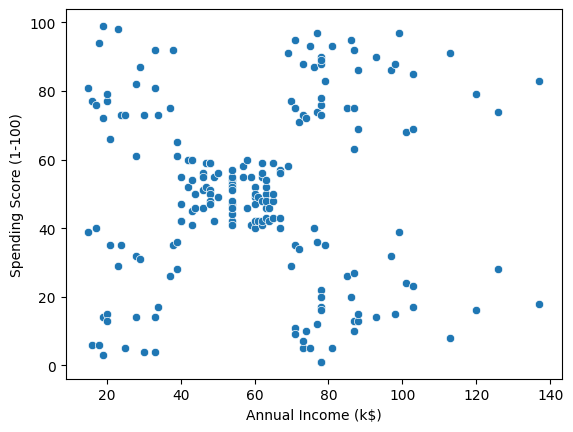

In [11]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)

## **Pairplot of numeric features**

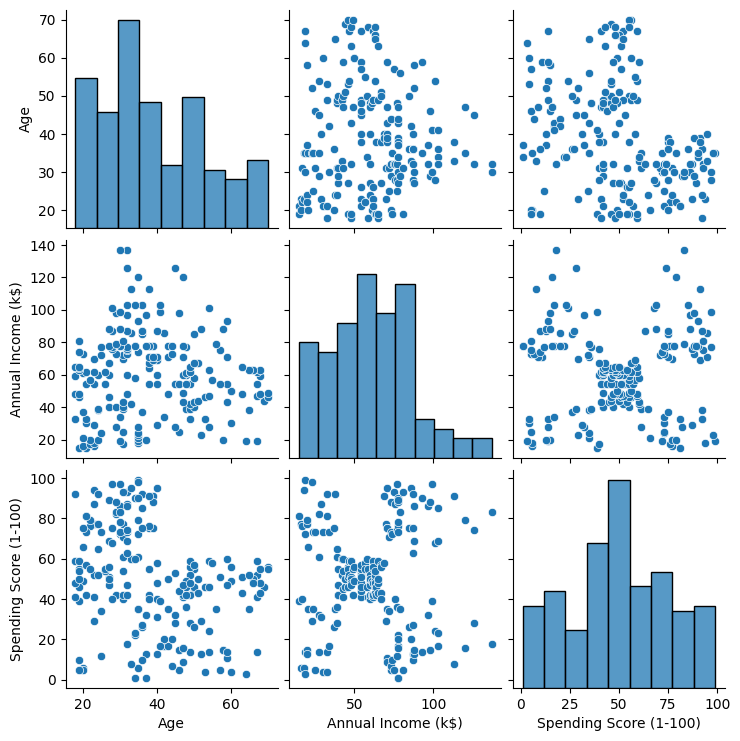

In [12]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# **KMeans Clustering**

In [13]:
#Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

## **Import KMeans**


In [14]:

from sklearn.cluster import KMeans

In [15]:
#Find optimal k using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

## **Plot Elbow curve**

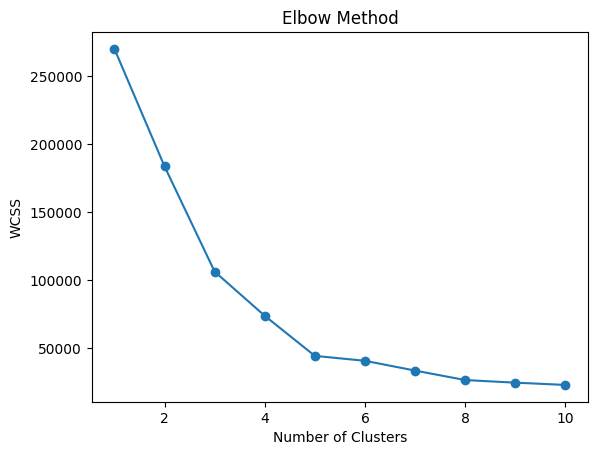

In [16]:

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [17]:
##Apply KMeans with optimal clusters (e.g., k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [19]:
#Check cluster counts
df['Cluster'].value_counts()

,count
Cluster,
0,81
1,39
3,35
4,23
2,22


In [20]:
 #Add cluster labels to dataset
df['Cluster'] = kmeans.labels_


In [26]:
# Group by cluster
df.groupby('Cluster')[df.select_dtypes(include='number').columns].mean()



,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
Cluster,,,,,
0,86.320988,42.716049,55.296296,49.518519,0.0
1,162.000000,32.692308,86.538462,82.128205,1.0
2,23.090909,25.272727,25.727273,79.363636,2.0
3,164.371429,41.114286,88.200000,17.114286,3.0
4,23.000000,45.217391,26.304348,20.913043,4.0


 ## **Visualize clusters**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

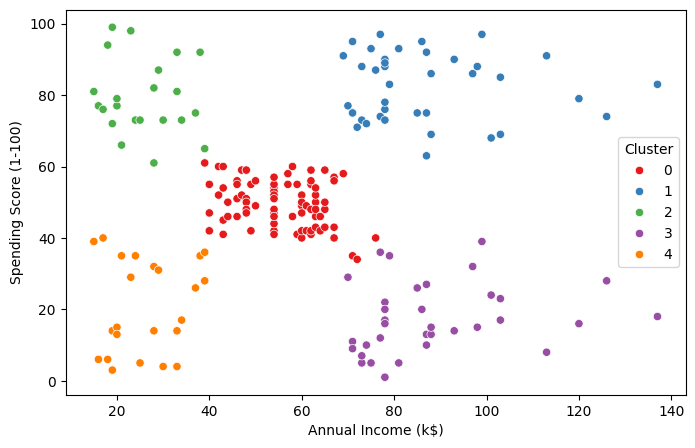

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')


##**Save clustered dataset**

In [30]:
df.to_csv("clustered_customers.csv", index=False)

## **PCA / t-SNE Visualization**

In [31]:
#Import PCA
from sklearn.decomposition import PCA

In [32]:
#Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [33]:
#Apply PCA (2D)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_X)

In [34]:
#Add PCA results to dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


## **Plot PCA clusters**

Text(0.5, 1.0, 'PCA Cluster Visualization')

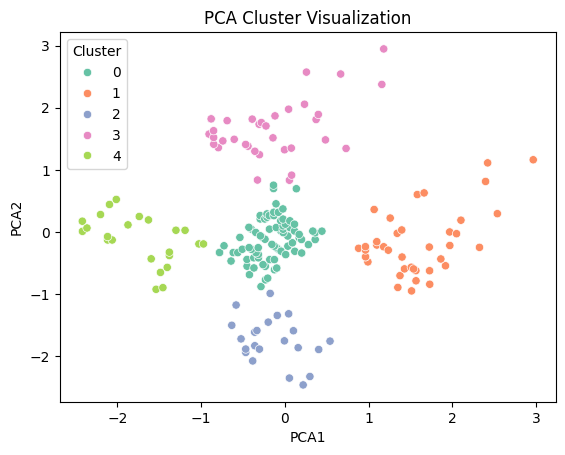

In [35]:
#Plot PCA clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('PCA Cluster Visualization')


In [36]:
# Import t-SNE
from sklearn.manifold import TSNE

In [37]:
#Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(scaled_X)

In [39]:
 #Add t-SNE results to dataframe
df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]

## **Plot t-SNE clusters**

Text(0.5, 1.0, 't-SNE Cluster Visualization')

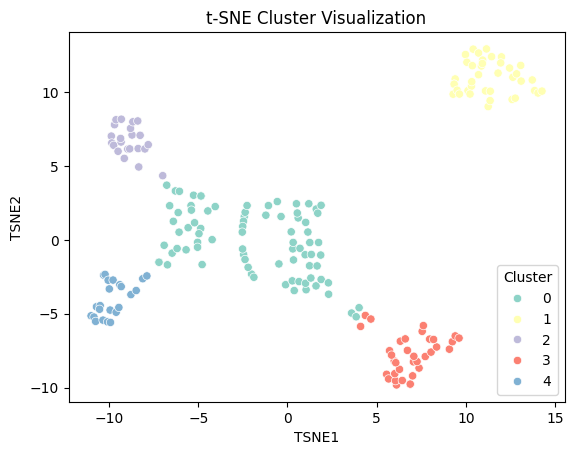

In [40]:
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df, palette='Set3')
plt.title('t-SNE Cluster Visualization')


 ## **Save plot**

In [42]:
plt.savefig("tsne_clusters.png")


<Figure size 640x480 with 0 Axes>

In [43]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>



## **Marketing Strategy per Segment**

In [44]:
# View average values per cluster
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [45]:
#Cluster 0 Analysis
print("Cluster 0: High income, high spenders — Target with luxury products")


Cluster 0: High income, high spenders — Target with luxury products


In [46]:
#Cluster 1 Analysis
print("Cluster 1: Low income, low spenders — Focus on budget deals & discounts")

Cluster 1: Low income, low spenders — Focus on budget deals & discounts


In [47]:
 #Cluster 2 Analysis
print("Cluster 2: Average income, high spenders — Use loyalty rewards")


Cluster 2: Average income, high spenders — Use loyalty rewards


In [48]:
#Cluster 3 Analysis
print("Cluster 3: Young, low income, moderate spenders — Target through social media ads")

Cluster 3: Young, low income, moderate spenders — Target through social media ads


In [49]:
#Cluster 4 Analysis
print("Cluster 4: High income, low spenders — Use personalized offers or surveys")

Cluster 4: High income, low spenders — Use personalized offers or surveys


In [50]:
#Create summary table
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})

Text(0.5, 1.0, 'Cluster Summary Heatmap')

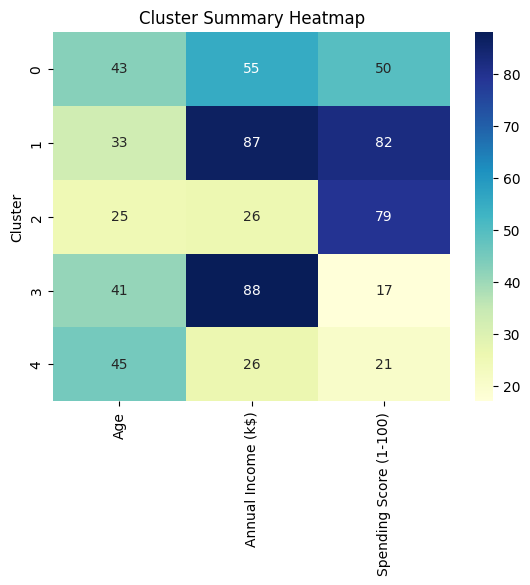

In [51]:
 #Visualize with heatmap
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu")
plt.title("Cluster Summary Heatmap")


##**Export marketing summary**

In [53]:
cluster_summary.to_csv("marketing_cluster_summary.csv")

In [54]:
#Final Output
print("Customer Segmentation and Strategy Completed ✔")

Customer Segmentation and Strategy Completed ✔
